<a href="https://colab.research.google.com/github/DataScienceProj/AI_for_CS-DS/blob/Akash_Tests/Leetcode_Analysis_DS401_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [156]:
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS201/master/datasets/Leetcode_analysis_complete_clean.csv")
df = df.drop(['Unnamed: 0'], axis=1)

java = df.drop(['python_submission'], axis=1)
java = java.drop(['slug'], axis =1)
python = df.drop(['java_submission'], axis=1)
python = python.drop(['slug'], axis =1)

In [104]:
df.dtypes

slug                 object
java_submission       int64
python_submission     int64
total_accepted        int64
total_submissions     int64
difficulty.level      int64
num_solutions         int64
num_likes             int64
num_dislikes          int64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   slug               90 non-null     object
 1   java_submission    90 non-null     int64 
 2   python_submission  90 non-null     int64 
 3   total_accepted     90 non-null     int64 
 4   total_submissions  90 non-null     int64 
 5   difficulty.level   90 non-null     int64 
 6   num_solutions      90 non-null     int64 
 7   num_likes          90 non-null     int64 
 8   num_dislikes       90 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 6.5+ KB


In [38]:
#Linear Regression Example http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [39]:
import seaborn as sns

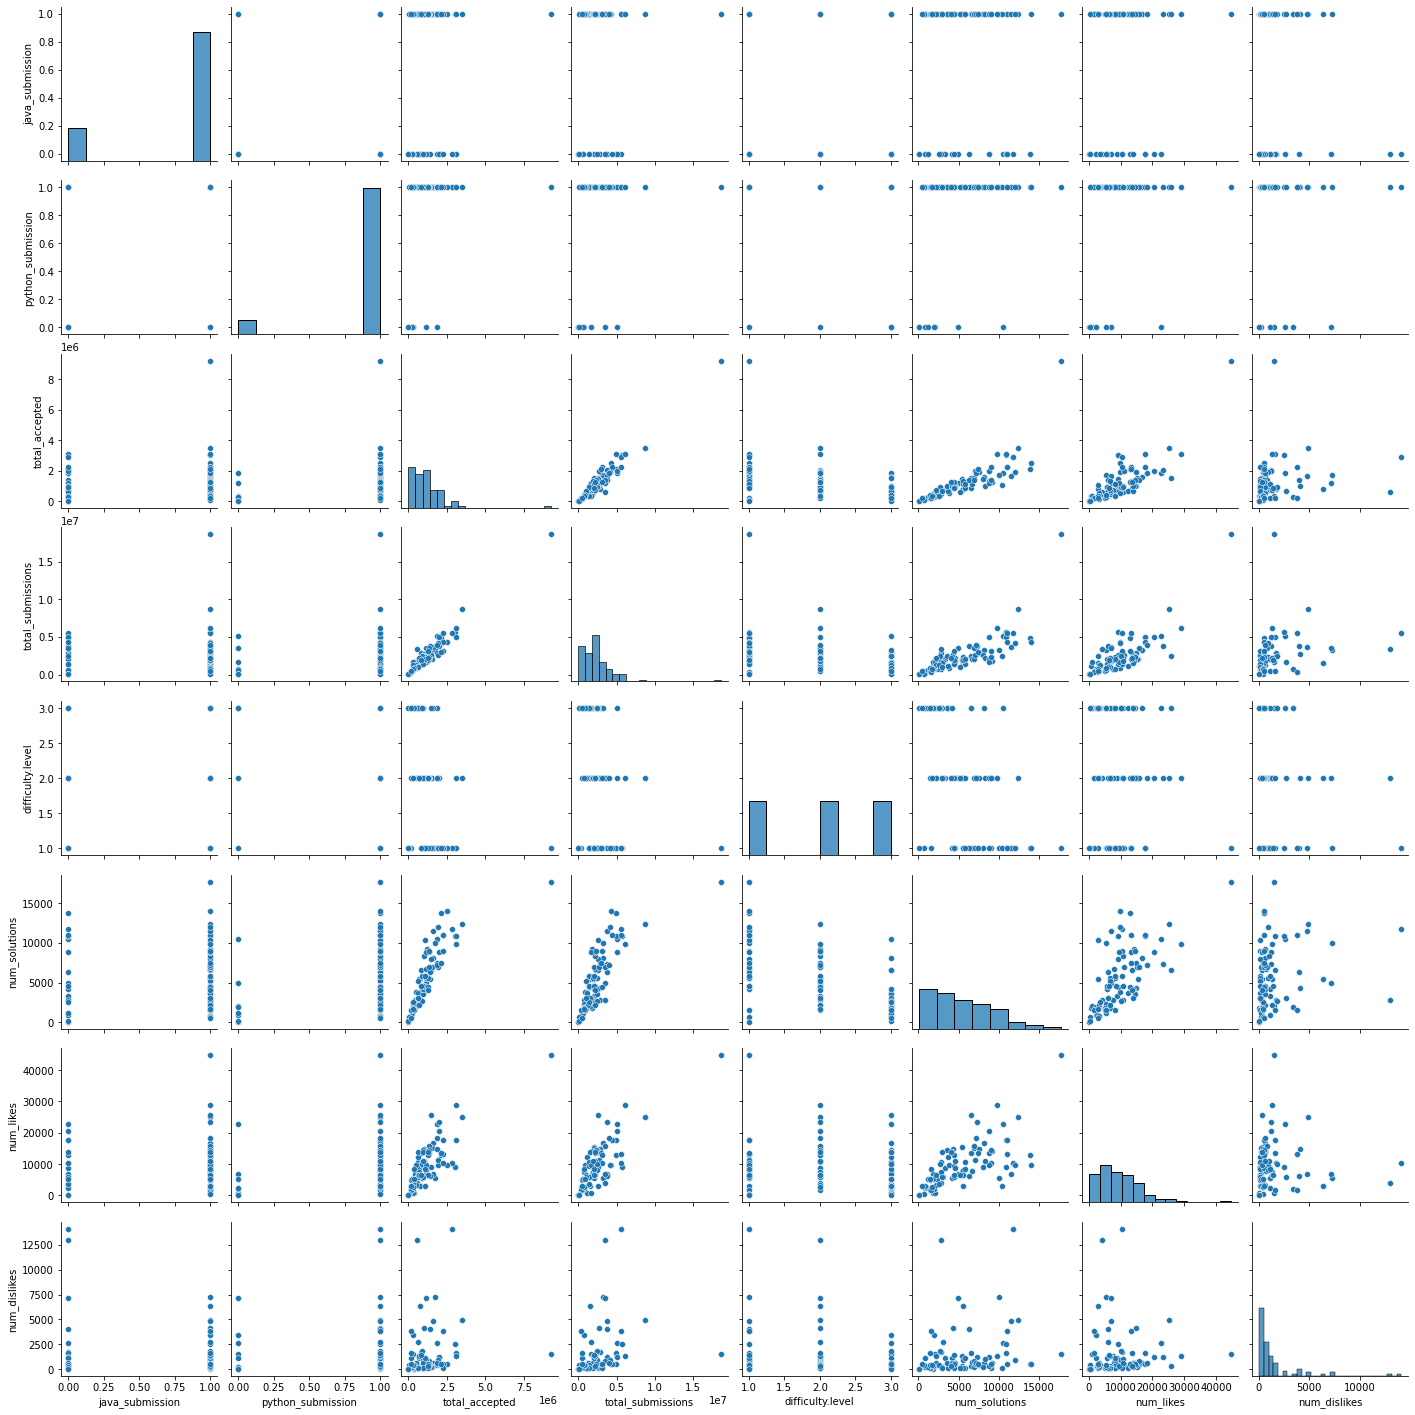

In [40]:
sns.pairplot(df)

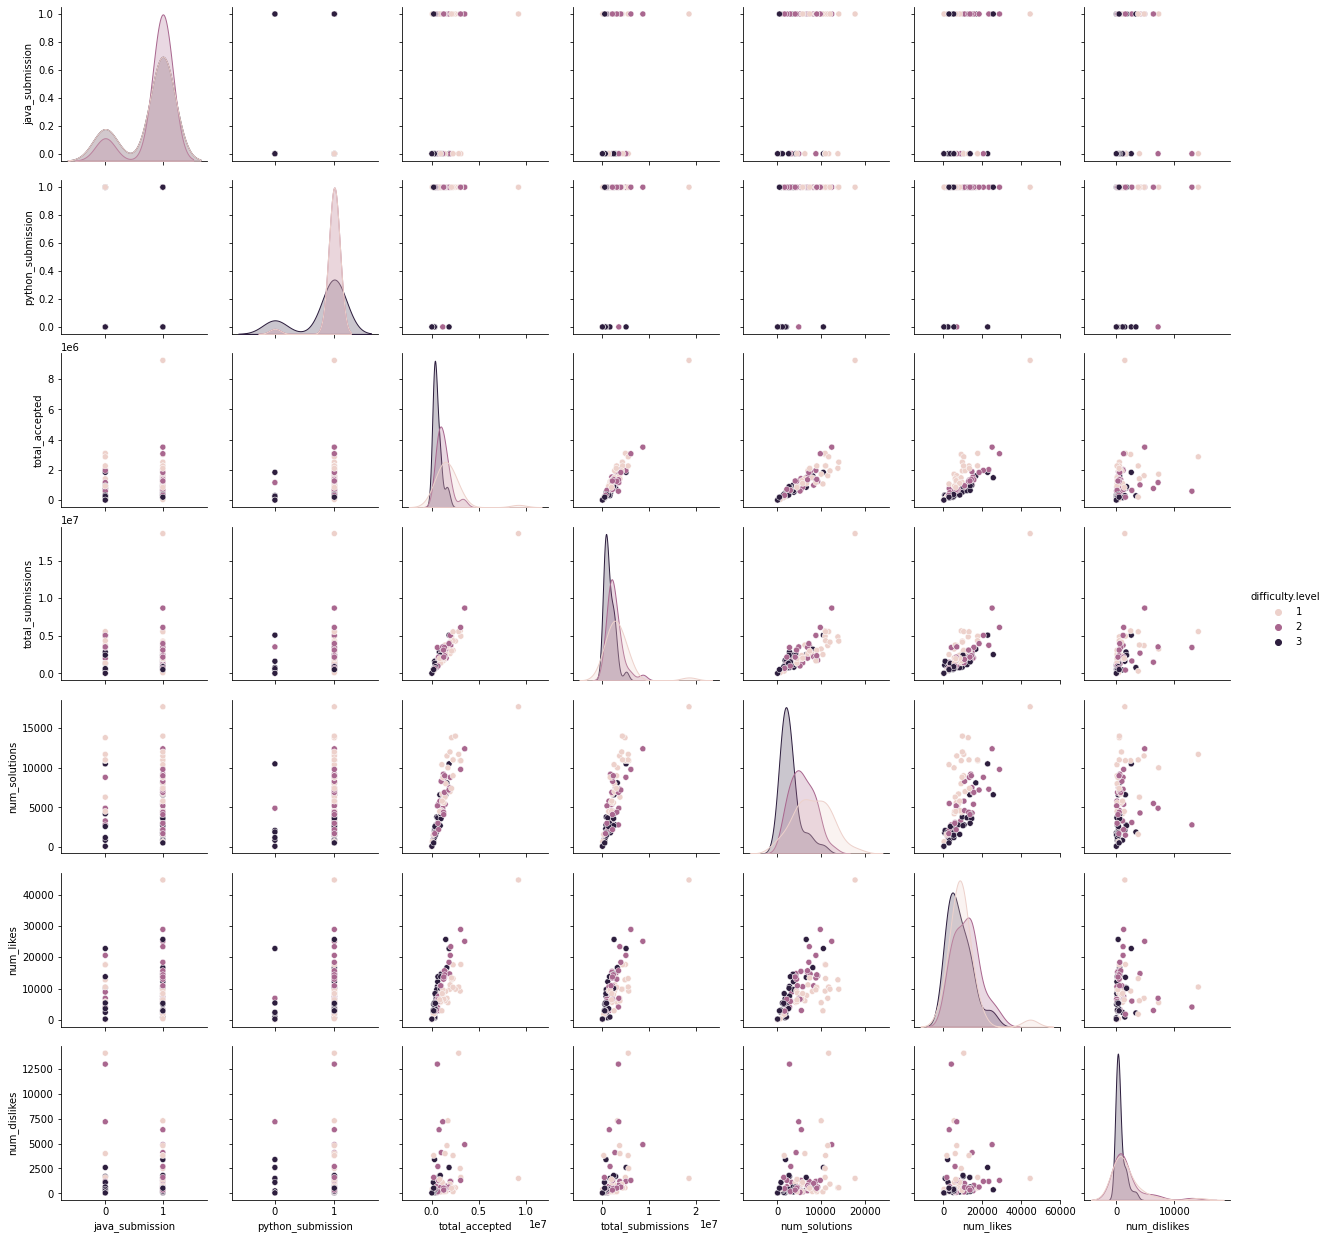

In [41]:
sns.pairplot(df, hue="difficulty.level")

In [82]:
df.corr()

,java_submission,python_submission,total_accepted,total_submissions,difficulty.level,num_solutions,num_likes,num_dislikes
java_submission,1.000000e+00,0.429478,-0.002187,-0.085189,-5.665583e-18,-0.006344,0.035054,-0.281206
python_submission,4.294778e-01,1.000000,0.184403,0.128994,-2.390913e-01,0.235325,0.211921,-0.073958
total_accepted,-2.186939e-03,0.184403,1.000000,0.962133,-4.338871e-01,0.818983,0.798943,0.170874
total_submissions,-8.518855e-02,0.128994,0.962133,1.000000,-3.464933e-01,0.775038,0.783198,0.275429
difficulty.level,-5.665583e-18,-0.239091,-0.433887,-0.346493,1.000000e+00,-0.557252,-0.081419,-0.195606
num_solutions,-6.343679e-03,0.235325,0.818983,0.775038,-5.572524e-01,1.000000,0.658776,0.206869
num_likes,3.505358e-02,0.211921,0.798943,0.783198,-8.141899e-02,0.658776,1.000000,-0.029204
num_dislikes,-2.812057e-01,-0.073958,0.170874,0.275429,-1.956058e-01,0.206869,-0.029204,1.000000


In [80]:
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

<ipython-input-80-d9dd0a8c734b>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm").set_precision(2)


,java_submission,python_submission,total_accepted,total_submissions,difficulty.level,num_solutions,num_likes,num_dislikes
java_submission,1.00,0.43,-0.00,-0.09,-0.00,-0.01,0.04,-0.28
python_submission,0.43,1.00,0.18,0.13,-0.24,0.24,0.21,-0.07
total_accepted,-0.00,0.18,1.00,0.96,-0.43,0.82,0.80,0.17
total_submissions,-0.09,0.13,0.96,1.00,-0.35,0.78,0.78,0.28
difficulty.level,-0.00,-0.24,-0.43,-0.35,1.00,-0.56,-0.08,-0.20
num_solutions,-0.01,0.24,0.82,0.78,-0.56,1.00,0.66,0.21
num_likes,0.04,0.21,0.80,0.78,-0.08,0.66,1.00,-0.03
num_dislikes,-0.28,-0.07,0.17,0.28,-0.20,0.21,-0.03,1.00


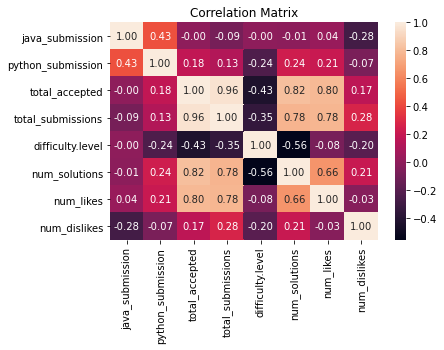

In [91]:
sns.heatmap(matrix, annot=True, fmt='.2f')
# plt.show()
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.title("Correlation Matrix")
plt.savefig("HEAT.jpg",  bbox_inches = 'tight', pad_inches = 0)

In [154]:
import numpy as np

y_true = np.array(y_test)
y_pred = np.array(y_pred)
# print(y_true)
# print(y_pred)

In [107]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

# Step 2: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Step 3: Split your data
X = java.drop('java_submission', axis=1)
y = java['java_submission']

# Step 4: Define the outer and inner cross-validation iterators
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 5: Set up the parameter grid for model tuning
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}

# Step 6: Perform nested cross-validation
best_score = 0
best_model = None
best_features = None

for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Step 7: Use GridSearchCV to tune the model
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=inner_cv)
    grid_search.fit(X_train, y_train)

    # Step 8: Get the best model and the best set of features
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_features = X.columns[grid_search.best_estimator_.coef_[0] != 0]

# Step 9: Train the best model on the entire dataset
best_model.fit(X[best_features], y)

# Step 10: Evaluate the best model on a held-out test set
X_train, X_test, y_train, y_test = train_test_split(X[best_features], y, test_size=0.2, random_state=42)
score = best_model.score(X_test, y_test)

# Step 11: Print the results
print(f'Best score: {best_score:.2f}')
print(f'Best model: {best_model}')
print(f'Best features: {best_features}')
print(f'Testing score: {score:.2f}')


Best score: 0.82
Best model: LogisticRegression(C=1, penalty='l1', solver='liblinear')
Best features: Index(['total_accepted', 'total_submissions', 'difficulty.level',
       'num_solutions', 'num_likes', 'num_dislikes'],
      dtype='object')
Testing score: 1.00


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# assuming that `X` and `y` are your input features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')
y_pred = model.predict(X_test)


Test accuracy: 0.7777777777777778


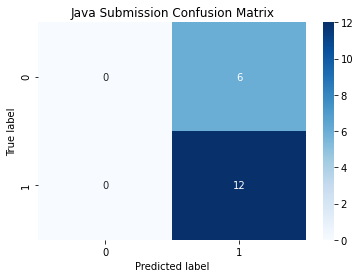

In [160]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming that `y_true` and `y_pred` are your true and predicted labels, respectively
cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Java Submission Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("ConfusionMatrixJava.jpg",  bbox_inches = 'tight', pad_inches = 0)


In [157]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

# Step 2: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Step 3: Split your data
X = python.drop('python_submission', axis=1)
y = python['python_submission']

# Step 4: Define the outer and inner cross-validation iterators
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 5: Set up the parameter grid for model tuning
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}

# Step 6: Perform nested cross-validation
best_score = 0
best_model = None
best_features = None

for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Step 7: Use GridSearchCV to tune the model
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=inner_cv)
    grid_search.fit(X_train, y_train)

    # Step 8: Get the best model and the best set of features
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_features = X.columns[grid_search.best_estimator_.coef_[0] != 0]

# Step 9: Train the best model on the entire dataset
best_model.fit(X[best_features], y)

# Step 10: Evaluate the best model on a held-out test set
X_train, X_test, y_train, y_test = train_test_split(X[best_features], y, test_size=0.2, random_state=42)
score = best_model.score(X_test, y_test)

# Step 11: Print the results
print(f'Best score: {best_score:.2f}')
print(f'Best model: {best_model}')
print(f'Best features: {best_features}')
print(f'Testing score: {score:.2f}')


/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

Best score: 0.94
Best model: LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
Best features: Index(['total_accepted', 'total_submissions', 'num_dislikes'], dtype='object')
Testing score: 0.94


/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/akashsetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# assuming that `X` and `y` are your input features and target variable, respectively
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')
y_pred = model.predict(X_test)

Test accuracy: 0.9444444444444444


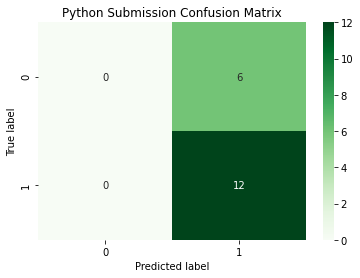

In [161]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming that `y_true` and `y_pred` are your true and predicted labels, respectively
cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

plt.title('Python Submission Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("ConfusionMatrixPython.jpg",  bbox_inches = 'tight', pad_inches = 0)